In [9]:
import sys,os
import statsmodels.api as sn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [10]:
np.random.seed(123)
time=np.arange(100)
arl_sample=np.zeros(100)
arl_sample[0]+=np.random.normal(loc=0,scale=2.5,size=1)
for t in time[1:]:
    arl_sample[t]=(0.7*arl_sample[t-1])+np.random.normal(loc=0,scale=2.5,size=1)
    

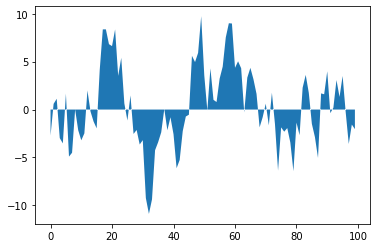

In [11]:
plt.fill_between(time,arl_sample)

In [12]:
model=sn.tsa.ARMA(arl_sample,(1,0)).fit(trend='nc',disp=0)
model.params

array([0.73389528])

In [13]:
np.random.seed(112)
ar2_sample=np.zeros(100)
ar2_sample[0:2]+=np.random.normal(loc=0,scale=2.5,size=2)
for t in time[2:]:
    ar2_sample[t]=(0.3 * ar2_sample[t-1])+(0.3 * ar2_sample[t-2])+ np.random.normal(loc=0,scale=2.5,size=1)
    

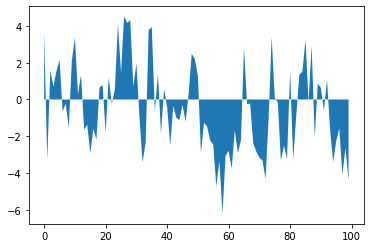

In [15]:
plt.fill_between(time,ar2_sample)

In [16]:
model=sn.tsa.ARMA(ar2_sample,(2,0)).fit(trend='nc',disp=0)
model.params

array([0.36737491, 0.24453912])

In [18]:
np.r_?


In [19]:
from statsmodels.tsa.arima_process import arma_generate_sample

arparams=np.array([0.3,0.3])
maparams=np.array([0])
ar=np.r_[1,-arparams]
ma=np.r_[1,maparams]
y=arma_generate_sample(ar,ma,100)

In [20]:
y

array([-1.51984157,  0.67981399,  0.30011375,  0.20345244, -0.28490488,
       -0.55295772, -1.27019017, -0.51131735,  0.02012517, -0.2144198 ,
        0.33229145,  1.19807916,  0.17461243,  1.89000476,  0.00704405,
        0.90378074, -1.51698796, -0.25660425, -1.04888257, -2.27489909,
       -0.64563666, -2.1231624 , -3.20286311, -2.47905131, -1.32045849,
        0.30626403,  1.46091661,  1.53894905,  0.22485497,  0.42187949,
        0.5843799 ,  0.53972857, -1.21336256,  0.31665899,  1.00928932,
       -1.71611584,  0.42963041, -1.34359123,  1.19970656,  0.59306512,
        1.12259248,  0.25513713,  0.79720379,  0.43397411,  0.67050419,
        1.0485339 ,  0.07252969, -1.1145812 , -0.59507615,  1.27257052,
       -1.69500592, -0.17072784, -0.51034712, -1.00355713,  1.6908578 ,
        0.69295449,  1.67582518,  0.07047456,  1.87423708, -0.31000334,
        1.35160548,  2.88627156,  0.43131432,  0.53266055, -0.18221448,
       -0.79308397, -0.08584845,  1.52059119, -0.5889062 ,  0.55

In [21]:
#moving average
np.random.seed(12)
time=np.arange(100)
mal_sample=np.zeros(100)
error=np.random.normal(loc=0,scale=2.5,size=100)
mal_sample[0]+=error[0]

for t in time[1:]:
    mal_sample[t]=(0.4 * error[t-1]+error[t])

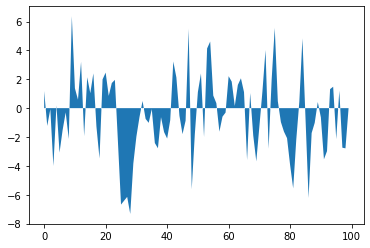

In [22]:
plt.fill_between(time,mal_sample)

In [23]:
model=sn.tsa.ARMA(mal_sample,(0,1)).fit(trend='nc',disp=0)
model.params

array([0.34274641])

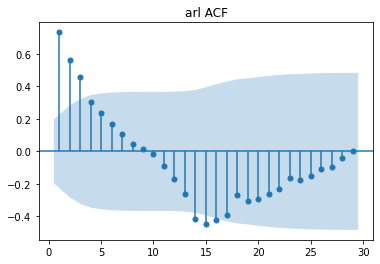

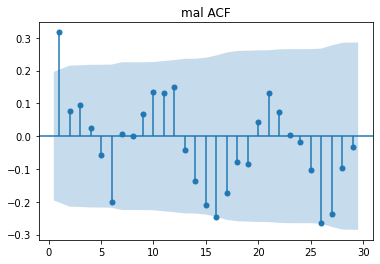

In [24]:
fig=sn.tsa.graphics.plot_acf(arl_sample,lags=range(1,30),alpha=0.05,title='arl ACF')
fig=sn.tsa.graphics.plot_acf(mal_sample,lags=range(1,30),alpha=0.05,title='mal ACF')

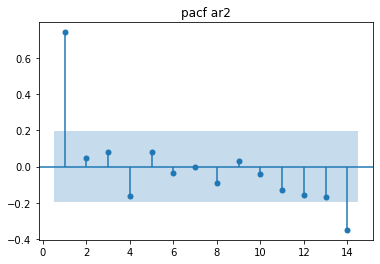

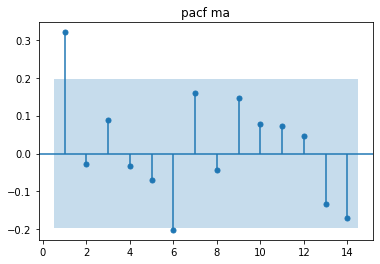

In [28]:
#pacf
fig=sn.tsa.graphics.plot_pacf(arl_sample,lags=range(1,15),alpha=0.05,title='pacf ar2')
fig=sn.tsa.graphics.plot_pacf(mal_sample,lags=range(1,15),alpha=0.05,title='pacf ma')